# 데이터 전처리 연습

## 기본 설정 및 패키지 로드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
_FILE_PATH="/content/drive/MyDrive/kr_youtube_data.csv"

In [ ]:
plt.plot([0,1],[1,0],label="한글 테스트용",)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

## 데이터 로드 및 전처리

### 데이터 로드

In [ ]:
df = pd.read_csv(_FILE_PATH)

전체적인 자료를 확인하고, 영상설명을 제외한 다른 모든 항목에 결측치가 없음을 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115754 entries, 0 to 115753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           115754 non-null  object
 1   title              115754 non-null  object
 2   publishedAt        115754 non-null  object
 3   channelId          115754 non-null  object
 4   channelTitle       115754 non-null  object
 5   categoryId         115754 non-null  int64 
 6   trending_date      115754 non-null  object
 7   tags               115754 non-null  object
 8   view_count         115754 non-null  int64 
 9   likes              115754 non-null  int64 
 10  dislikes           115754 non-null  int64 
 11  comment_count      115754 non-null  int64 
 12  thumbnail_link     115754 non-null  object
 13  comments_disabled  115754 non-null  bool  
 14  ratings_disabled   115754 non-null  bool  
 15  description        112458 non-null  object
dtypes: bool(2), int64(5)

### 데이터 전처리

- 영상 설명, 영상의 고유 아이디, 썸네일 링크, 채널 고유 번호와 같이, 불필요한 데이터 삭제

In [ ]:
delete_cols = ['description','video_id','thumbnail_link','channelId']
df_droped = df.drop(delete_cols, axis=1)
df_droped.head()

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,False,False
1,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,False,False
2,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,False,False
3,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,False,False
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,False,False


조회수 기준 내림차순으로 정렬한 뒤, 중복 데이터를 삭제

In [ ]:
df_sorted = df_droped.sort_values(by="view_count", ascending = False)

In [ ]:
df_dup = df_sorted.drop_duplicates(["title","channelTitle"],keep='first')
df_dup[:100]

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
55138,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-06-04T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,296314174,16464253,181350,6939302,False,False
2733,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-31T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,262319276,16254784,770144,6303708,False,False
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-09T03:59:12Z,HYBE LABELS,10,2021-07-24T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,194795844,12767906,136328,2903747,False,False
79542,LISA - 'LALISA' M/V,2021-09-10T04:00:13Z,BLACKPINK,10,2021-09-22T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,192376395,12177724,151884,2498669,False,False
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,BLACKPINK,10,2020-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795696,879358,2735999,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
88529,NCT 127 엔시티 127 'Favorite (Vampire)' MV,2021-10-25T09:01:41Z,SMTOWN,10,2021-11-06T00:00:00Z,[None],28978347,1442698,12385,212534,False,False
89742,THE BOYZ(더보이즈) ‘MAVERICK’ MV,2021-11-01T09:00:01Z,THE BOYZ,10,2021-11-12T00:00:00Z,크래커엔터테인먼트|Cre.ker Entertainment|크래커|Creker|THE...,28791271,377840,4172,35756,False,False
34335,The Weeknd’s FULL Pepsi Super Bowl LV Halftime...,2021-02-08T01:57:48Z,NFL,17,2021-02-18T00:00:00Z,Tampa Bay Buccaneers|Kansas City Chiefs|super ...,28248100,1115904,57377,119982,False,False
79546,LISA - 'LALISA' SPECIAL STAGE,2021-09-12T15:00:00Z,BLACKPINK,10,2021-09-22T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,28082757,2698222,32799,85070,False,False


원활한 분석을 위해 인덱스를 현 자료에 맞추어 재설정
- 대부분 상위 자료가 `categoryId` 10에 해당하는 음악 영상

In [ ]:
df_dup=df_dup.reset_index(drop=True)

In [ ]:
df_dup.head()

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-06-04T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,296314174,16464253,181350,6939302,False,False
1,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-31T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,262319276,16254784,770144,6303708,False,False
2,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-09T03:59:12Z,HYBE LABELS,10,2021-07-24T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,194795844,12767906,136328,2903747,False,False
3,LISA - 'LALISA' M/V,2021-09-10T04:00:13Z,BLACKPINK,10,2021-09-22T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,192376395,12177724,151884,2498669,False,False
4,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,BLACKPINK,10,2020-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795696,879358,2735999,False,False


음악 영상 제거 및 인덱스 재설정

In [ ]:
delete_indicies = [ i for i in range(len(df_dup)) if df_dup["categoryId"][i] in [10] ]

In [ ]:
df_droped = df_dup.drop(delete_indicies,axis=0)

In [ ]:
df_sorted = df_droped.sort_values(by="view_count",ascending=False)
df_sorted = df_sorted.reset_index(drop=True)

In [ ]:
df_sorted.head()

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,The Call | Season 2022 Cinematic - League of L...,2022-01-07T15:06:43Z,League of Legends,20,2022-01-18T00:00:00Z,Riot Games|Riot|League of Legends|League|LoL|M...,90978675,628274,0,27684,False,False
1,Apple Event — October 13,2020-10-13T18:15:12Z,Apple,28,2020-10-22T00:00:00Z,Apple|Event|Keynote|Tim Cook|October|2020|Laun...,53761626,923078,53473,0,True,False
2,Join the BTS #PermissiontoDance Challenge only...,2021-08-06T00:33:36Z,YouTube,27,2021-08-10T00:00:00Z,[None],51624621,0,0,2,False,True
3,TREASURE - '직진 (JIKJIN)' M/V,2022-02-15T09:00:14Z,TREASURE (트레저),24,2022-02-27T00:00:00Z,YG Entertainment|YG|와이지|K-pop|트레져|트레저|TREASURE...,46738207,1705442,0,866379,False,False
4,오징어 게임 3분 요약 [Squid Game 3 minutes summary],2021-09-26T07:31:20Z,소맥거핀,1,2021-10-09T00:00:00Z,메이플|메이플스토리|메이플 만화|게임 만화|병맛|웃긴|만화|루시드냥|소맥거핀|애니메...,35853161,966094,18815,34813,False,False


In [ ]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14198 entries, 0 to 14197
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              14198 non-null  object
 1   publishedAt        14198 non-null  object
 2   channelTitle       14198 non-null  object
 3   categoryId         14198 non-null  int64 
 4   trending_date      14198 non-null  object
 5   tags               14198 non-null  object
 6   view_count         14198 non-null  int64 
 7   likes              14198 non-null  int64 
 8   dislikes           14198 non-null  int64 
 9   comment_count      14198 non-null  int64 
 10  comments_disabled  14198 non-null  bool  
 11  ratings_disabled   14198 non-null  bool  
dtypes: bool(2), int64(5), object(5)
memory usage: 1.1+ MB


최초에 115754행이 있었지만, 현재 14198로 자료가 축소된 것을 확인할 수 있다.

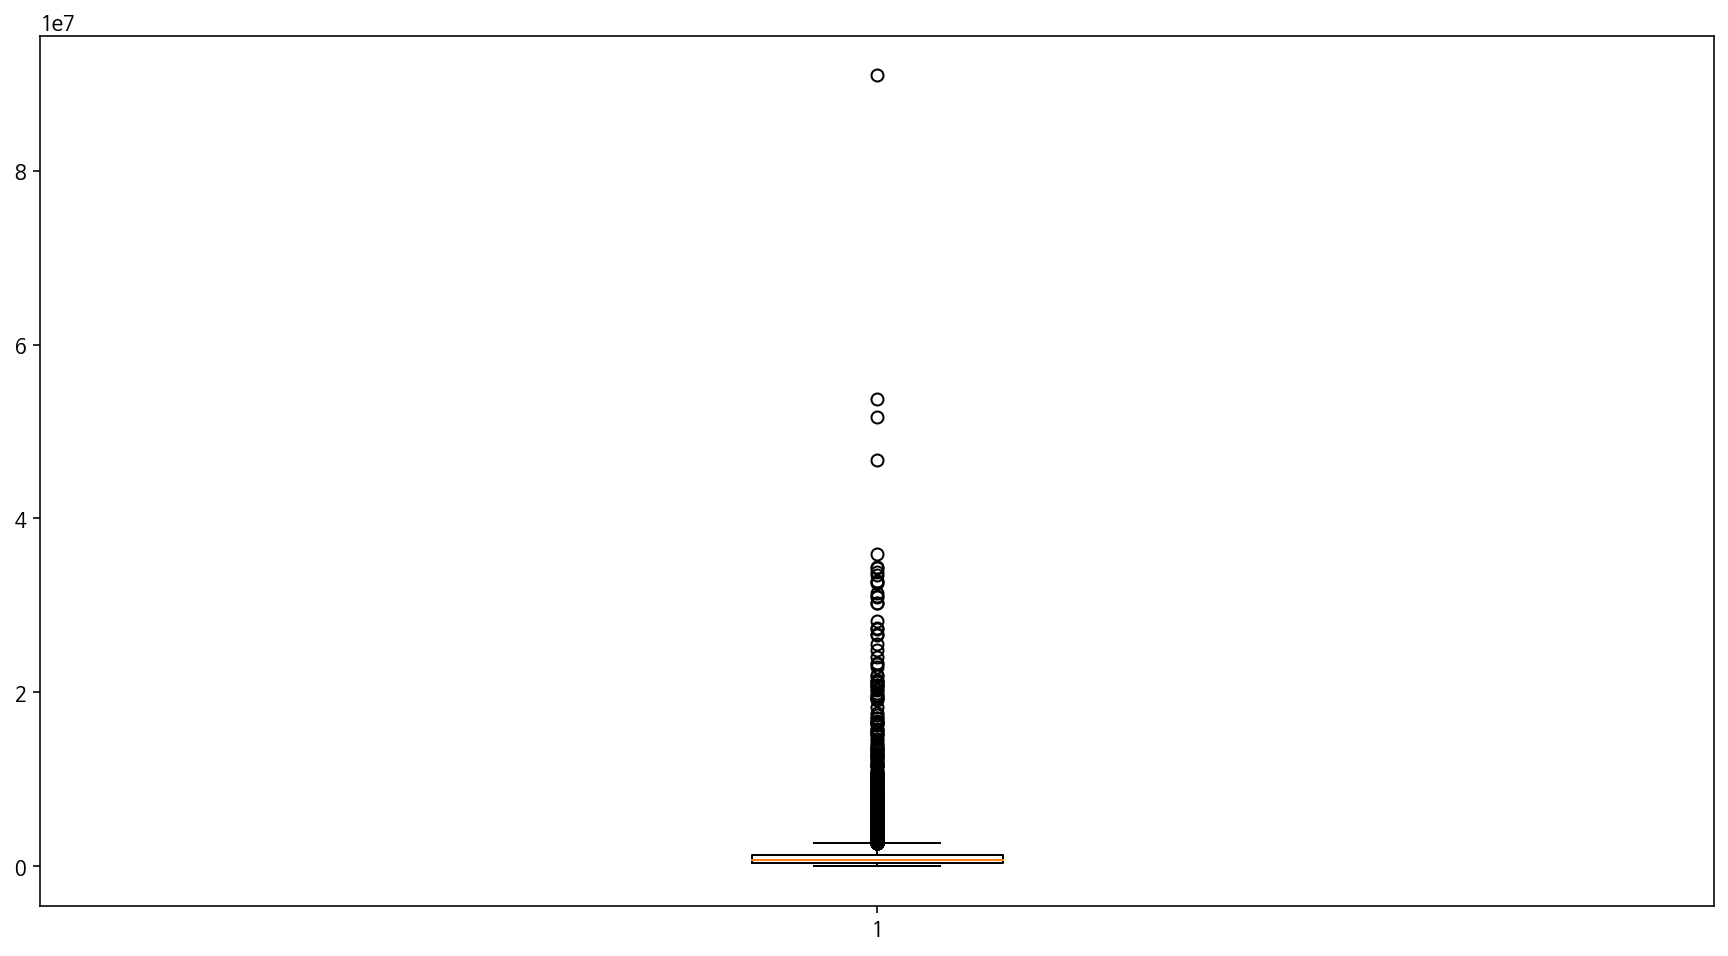

In [ ]:
plt.figure(figsize=(15, 8))

plt.rcParams["axes.unicode_minus"] = False

plt.boxplot(df_sorted["view_count"])
plt.show()

자료를 간추렸음에도 불구하고, 이상치가 굉장히 넓은 범위에 분포하는 것을 알 수 있다.

_**`###########################################################################`**_

In [ ]:
yt = df_sorted # 타이핑 편하게 새로운 변수명에 데이터프레임 할당...

In [ ]:
yt["publishedAt"]=pd.to_datetime(yt["publishedAt"])
yt["trending_date"]=pd.to_datetime(yt["trending_date"])

In [ ]:
# 타이핑하기 쉬운 열 이름으로 변경
yt = yt.rename(
    columns={
    "publishedAt":"update",
    "trending_date":"trdate"
})

In [ ]:
yt.head()

,title,update,channelTitle,categoryId,trdate,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,The Call | Season 2022 Cinematic - League of L...,2022-01-07 15:06:43+00:00,League of Legends,20,2022-01-18 00:00:00+00:00,Riot Games|Riot|League of Legends|League|LoL|M...,90978675,628274,0,27684,False,False
1,Apple Event — October 13,2020-10-13 18:15:12+00:00,Apple,28,2020-10-22 00:00:00+00:00,Apple|Event|Keynote|Tim Cook|October|2020|Laun...,53761626,923078,53473,0,True,False
2,Join the BTS #PermissiontoDance Challenge only...,2021-08-06 00:33:36+00:00,YouTube,27,2021-08-10 00:00:00+00:00,[None],51624621,0,0,2,False,True
3,TREASURE - '직진 (JIKJIN)' M/V,2022-02-15 09:00:14+00:00,TREASURE (트레저),24,2022-02-27 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|트레져|트레저|TREASURE...,46738207,1705442,0,866379,False,False
4,오징어 게임 3분 요약 [Squid Game 3 minutes summary],2021-09-26 07:31:20+00:00,소맥거핀,1,2021-10-09 00:00:00+00:00,메이플|메이플스토리|메이플 만화|게임 만화|병맛|웃긴|만화|루시드냥|소맥거핀|애니메...,35853161,966094,18815,34813,False,False


#### tags 열 정리하기

##### yt **"tags"** 열의 `[None]` 값을 결측치로 바꿔주기
- `[None]` 값이 남아있으면, 비어있는 리스트가 아닌 `[None]` 이라는 문자열을 가진 길이 1의 리스트가 될 것
  - 이를 방지하기 위해 `[None]`을 `''`, 즉 결측값으로 대체

In [ ]:
yt1=yt.copy() # 실수 방지용

In [ ]:
mask = yt1["tags"]=="[None]"

In [ ]:
yt1.loc[mask,"tags"]=""

In [ ]:
yt1.head()

,title,update,channelTitle,categoryId,trdate,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,The Call | Season 2022 Cinematic - League of L...,2022-01-07 15:06:43+00:00,League of Legends,20,2022-01-18 00:00:00+00:00,Riot Games|Riot|League of Legends|League|LoL|M...,90978675,628274,0,27684,False,False
1,Apple Event — October 13,2020-10-13 18:15:12+00:00,Apple,28,2020-10-22 00:00:00+00:00,Apple|Event|Keynote|Tim Cook|October|2020|Laun...,53761626,923078,53473,0,True,False
2,Join the BTS #PermissiontoDance Challenge only...,2021-08-06 00:33:36+00:00,YouTube,27,2021-08-10 00:00:00+00:00,,51624621,0,0,2,False,True
3,TREASURE - '직진 (JIKJIN)' M/V,2022-02-15 09:00:14+00:00,TREASURE (트레저),24,2022-02-27 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|트레져|트레저|TREASURE...,46738207,1705442,0,866379,False,False
4,오징어 게임 3분 요약 [Squid Game 3 minutes summary],2021-09-26 07:31:20+00:00,소맥거핀,1,2021-10-09 00:00:00+00:00,메이플|메이플스토리|메이플 만화|게임 만화|병맛|웃긴|만화|루시드냥|소맥거핀|애니메...,35853161,966094,18815,34813,False,False


##### 리스트 형태로 변환
- 추후 태그를 통한 분석을 실시할 때에, list 형태로 저장되어있는 것이 분석에 더 용이할 것이라 판단
  - tags의 값들을 모두 `|` 문자를 기준으로 나누어 리스트로 저장할 예정

In [ ]:
for i in range(0,14198):
  yt1["tags"][i] = yt1["tags"][i].split("|")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
yt1["tags"] # 실수 없이 모두 변경된 것을 확인

0        [Riot Games, Riot, League of Legends, League, ...
1        [Apple, Event, Keynote, Tim Cook, October, 202...
2                                                       []
3        [YG Entertainment, YG, 와이지, K-pop, 트레져, 트레저, T...
4        [메이플, 메이플스토리, 메이플 만화, 게임 만화, 병맛, 웃긴, 만화, 루시드냥,...
                               ...                        
14193    [사사건건, KBS, 뉴스, KBS1TV, 김원장, 정치, 여의도사사건건, 사사건건...
14194    [사사건건, KBS, 뉴스, KBS1TV, 김원장, 정치, 여의도사사건건, 사사건건...
14195                      [YTN라디오, 라디오프로그램, 이동형의 뉴스 정면승부]
14196    [YouTube Originals, YouTube, Hello 2021 Korea,...
14197                                                   []
Name: tags, Length: 14198, dtype: object

In [ ]:
yt=yt1.copy() # 모든 작업이 완료되었으니, 다시 원래 변수명으로 데이터프레임 반환

# 시간/요일과 조회수 & 좋아요 그림 확인하기

## 재차 데이터 변환 작업...
- 처음부터 분석의 목적이 명확했다면 이럴 일이 없었을 것...
- 하지만 지금은 배운 것을 복습하는 것이 목적이니 그냥 넘어가자

### 시간 데이터 추가 및 불필요한 데이터 제거
- 편의상 **시간**, **요일**, **조회수**, **좋아요** 데이터만 두고 다른 열 모두 삭제

> 물론 이 데이터를 통해 시간, 요일 별 자료를 조회하는 것은 의미가 없다. 

>지금은 분석보다 단순히 **연습** 목적으로 데이터를 다루고 있다. 실제 상관관계, 인과관계 등은 고려하지 말고, 재미로만 보자.

In [ ]:
import datetime as dt

In [ ]:
yt2=yt.copy() # yt2의 update 열 값들을 모두 시간 값으로 바꿀 예정

In [ ]:
yt2["uptime"] = yt2["update"].dt.hour
yt2["updow"] = yt2["update"].dt.dayofweek

In [ ]:
yt2.head(1)

,title,update,channelTitle,categoryId,trdate,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,uptime,updow
0,The Call | Season 2022 Cinematic - League of L...,2022-01-07 15:06:43+00:00,League of Legends,20,2022-01-18 00:00:00+00:00,"[Riot Games, Riot, League of Legends, League, ...",90978675,628274,0,27684,False,False,15,4


In [ ]:
delete_cols = ["trdate","update","channelTitle","categoryId","tags","dislikes","comment_count","comments_disabled","ratings_disabled"]

In [ ]:
yt2 = yt2.drop(delete_cols,axis=1)

In [ ]:
yt2.head(1)

,title,view_count,likes,uptime,updow
0,The Call | Season 2022 Cinematic - League of L...,90978675,628274,15,4


### dow(day of week)를 글자로 바꿔주자
- **월요일이 0, 일요일이 6**
- 함수를 안써주면 for문으로 계산이 늘어난다.
  - 함수를 써주면 apply 함수를 통한 병렬 계산이 가능해진다.
  - for문을 자주 쓰는건 시간 복잡도를 늘려 좋지 않다고 했다.

In [ ]:
def dow_str_func(x):
  if x == 0:
    return "월"
  elif x == 1:
    return "화"
  elif x == 2:
    return "수"
  elif x == 3:
    return "목"
  elif x == 4:
    return "금"
  elif x == 5:
    return "토"
  else:
    return "일"

### 무턱대고 글자로 바꿔줬더니 그래프를 볼 수가 없다.

In [ ]:
def dow_num_func(x):
  if x == "월":
    return 0
  elif x == "화":
    return 1
  elif x == "수":
    return 2
  elif x == "목":
    return 3
  elif x == "금":
    return 4
  elif x == "토":
    return 5
  else:
    return 6

In [ ]:
#yt2["updow"] = yt2["updow"].apply(dow_str_func)
yt2["updow"] = yt2["updow"].apply(dow_num_func)

In [ ]:
yt2.head(2)
# 변환이 끝났다!

,title,view_count,likes,uptime,updow
0,The Call | Season 2022 Cinematic - League of L...,90978675,628274,15,4
1,Apple Event — October 13,53761626,923078,18,1


## 여러가지 그래프 적용해보기

### pairplot
- 요일 데이터를 문자로 전환하니, pairplot에서는 확인이 안된다

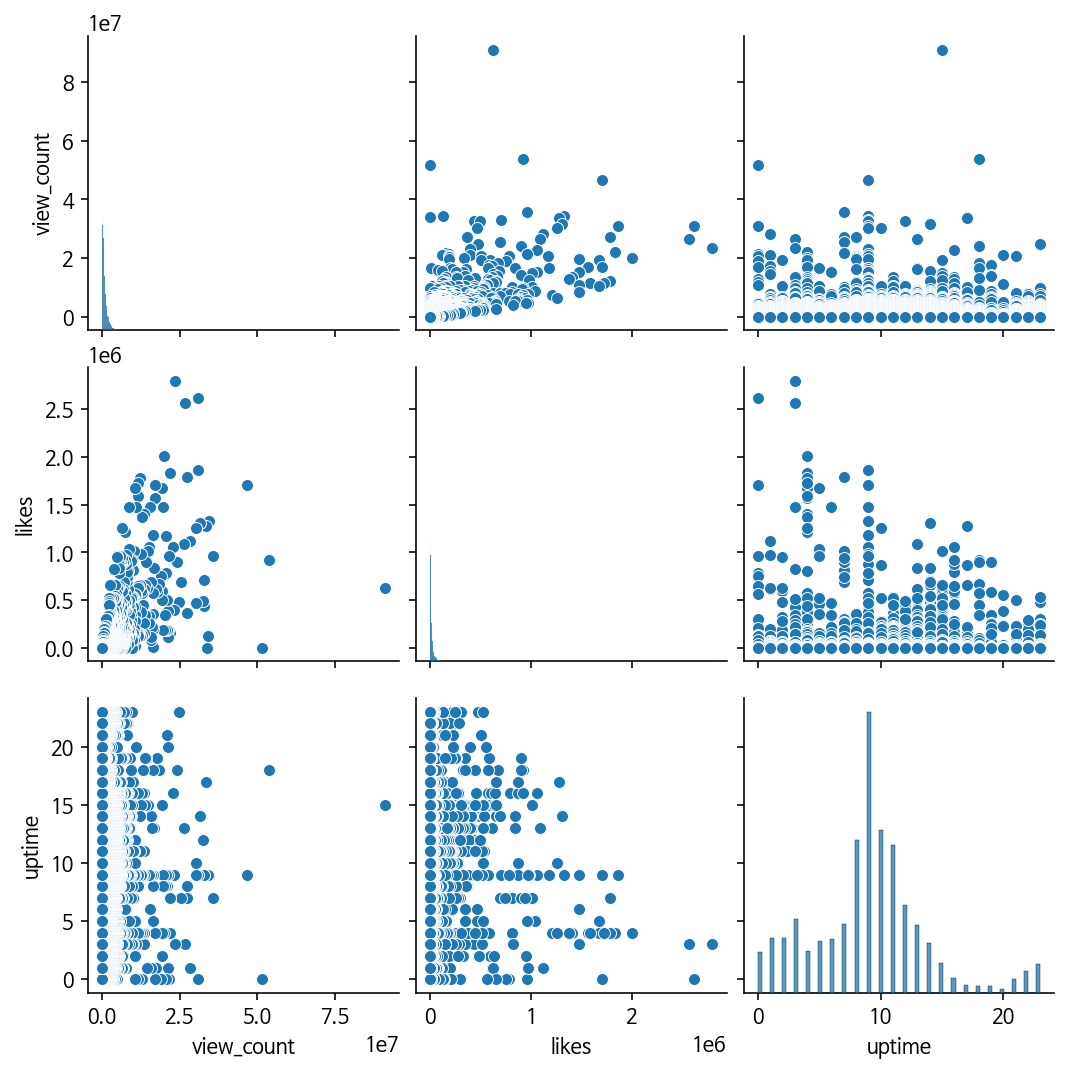

In [ ]:
sns.pairplot(yt2)
plt.show()

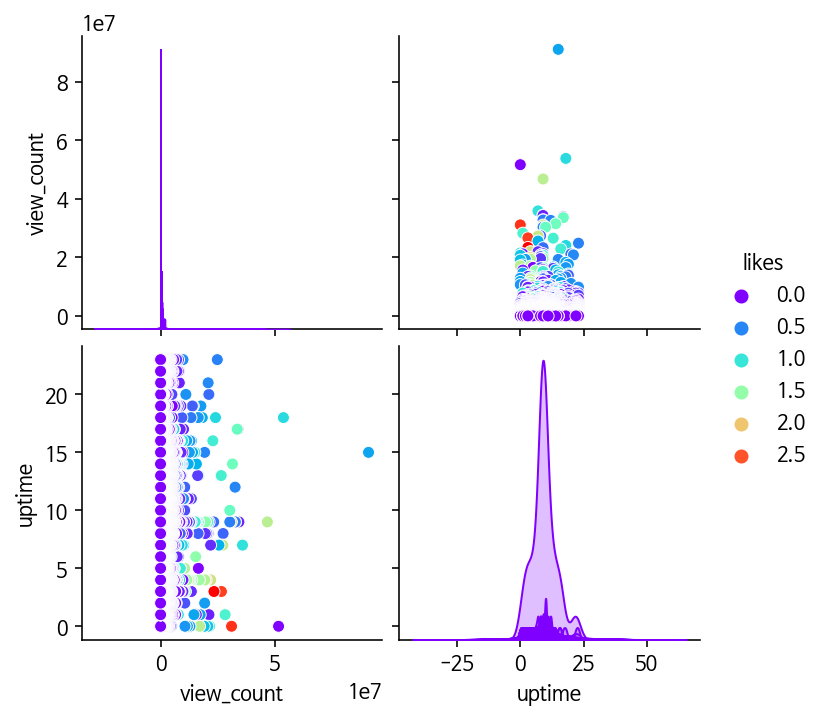

In [ ]:
sns.pairplot(yt2, hue='likes', palette='rainbow')
plt.show()

### 업데이트시간/요일은 정규성을 띄는가?
- 시간은 정규성이 보이는 듯 하지만, 그러한 성질을 갖고있다고 볼 순 없을 것 같다.
- 업로드 요일에서 정규분포표가 나올거라는 기대가 있다는 것이 코미디다.
- 번외로, 금요일이 대목이고, 토, 일은 유투버들도 쉬는 것 같다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


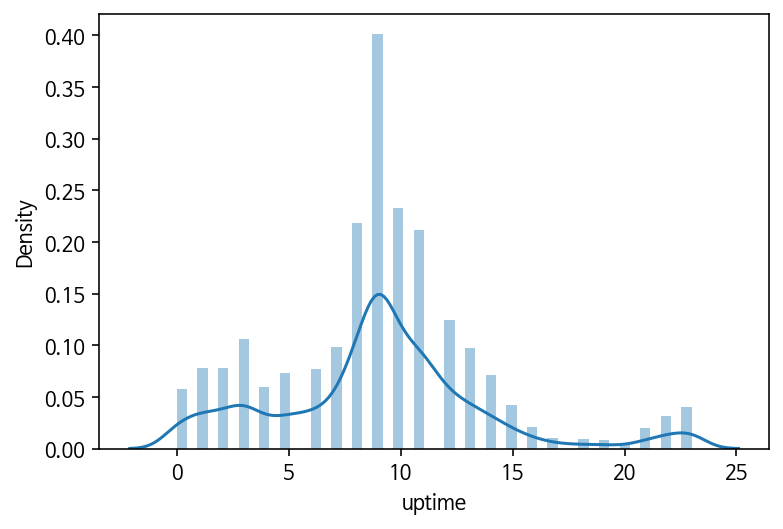

In [ ]:
sns.distplot(yt2['uptime'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


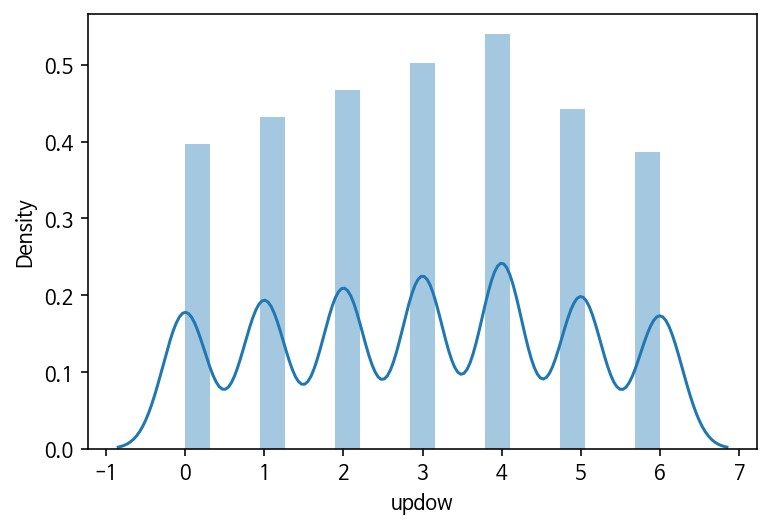

In [ ]:
sns.distplot(yt2['updow'])
plt.show()

### 바 플롯
- 요일마다 가장 많이 올리는 시간이 언제일까?

In [ ]:
yt2.head()

,title,view_count,likes,uptime,updow
0,The Call | Season 2022 Cinematic - League of L...,90978675,628274,15,4
1,Apple Event — October 13,53761626,923078,18,1
2,Join the BTS #PermissiontoDance Challenge only...,51624621,0,0,4
3,TREASURE - '직진 (JIKJIN)' M/V,46738207,1705442,9,1
4,오징어 게임 3분 요약 [Squid Game 3 minutes summary],35853161,966094,7,6


In [ ]:
yt2_1 = yt2.copy()
yt2_1["updow"] = yt2["updow"].apply(dow_str_func)


In [ ]:
yt2_1.head()

,title,view_count,likes,uptime,updow
0,The Call | Season 2022 Cinematic - League of L...,90978675,628274,15,금
1,Apple Event — October 13,53761626,923078,18,화
2,Join the BTS #PermissiontoDance Challenge only...,51624621,0,0,금
3,TREASURE - '직진 (JIKJIN)' M/V,46738207,1705442,9,화
4,오징어 게임 3분 요약 [Squid Game 3 minutes summary],35853161,966094,7,일


In [ ]:
choose_columns = ["updow","uptime"]
yt2_2=yt2_1[choose_columns]

In [ ]:
yt2_2.head()

,updow,uptime
0,금,15
1,화,18
2,금,0
3,화,9
4,일,7


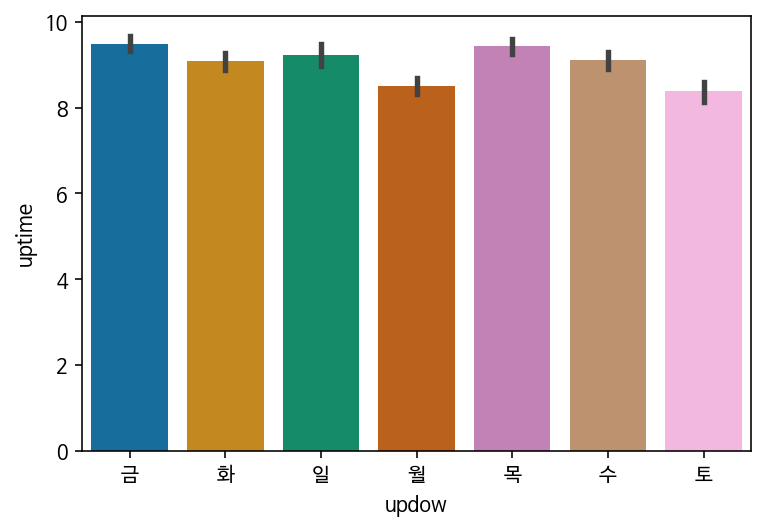

In [ ]:
sns.barplot(x='updow', y='uptime', data=yt2_2, palette='colorblind')
plt.show()

### 산점도
- 보기에는 아주 예쁘다.

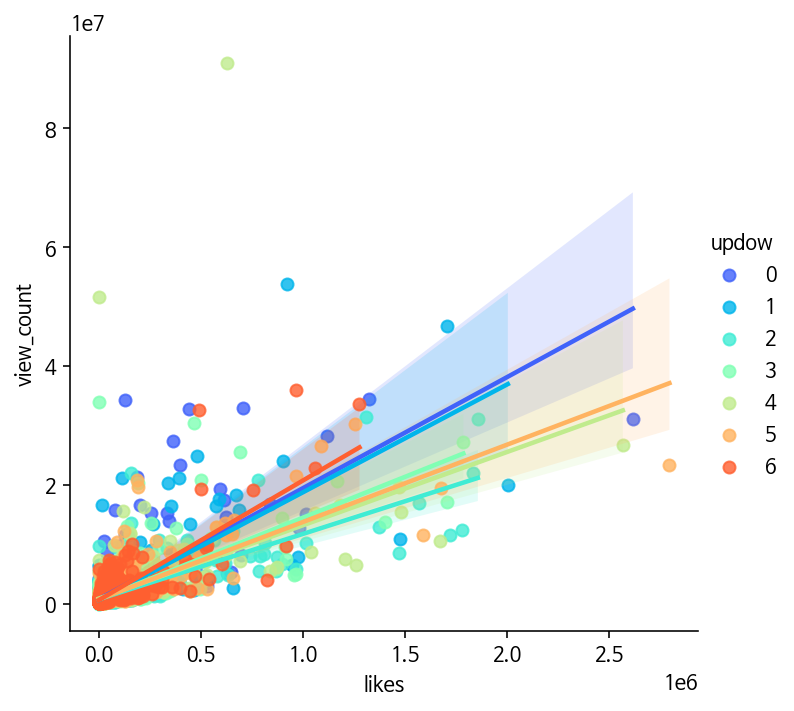

In [ ]:
sns.lmplot(x='likes', y='view_count',hue='updow', data=yt2, palette='rainbow')
plt.show()

# 느낀것
- 데이터에 맞는 그래프를 쓰자. 만개의 데이터가 각각이 키값으로 인식되니 불상사가 일어난다.
 - 덮어놓고 그래프부터 그리지 말고, 맞는 그래프를 생각하고 그려야,,,

- 특정 열 값을 변경할 때 실수를 많이한다. 예를 들면,
```python
yt = yt["update"].dt.hour
```
위와 같이 입력하여 데이터프레임을 통째로 날려버린 적이 한두번이 아니다.
```python
yt["update"] = yt["update"].dt.hour
```
반드시 주의하자.

- 확실히 관계없어보이는 자료들을 넣으니, 여기서는 뭔가 결과를 얻기가 힘들다.

#다음에 해볼만한 것들

- 업로드 시간과 인급동 등재 시간 관계 확인해보기
  - 아마 중복되는 데이터를 삭제하지 않고 해볼지도?

- 어느 요일에 어떤 종류의 영상들이 많이 올라오나?
- 뉴스 등의 데이터를 통해서, 어떠한 이슈가 있을 때 어떠한 동영상이 인급동에 올라갔는지도 볼 수 있겠다

- 특정 시간대에 특정 영상들이 인급동에 올라가는 경향이 있을까?